# Alternative More Detailed Solution for Lab01 - Task C

In [ ]:
%matplotlib inline
import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Data generation
n, d, k = 100, 2, 2
np.random.seed(20)
X = rand(n, d)
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2
S = np.diag(rand(d))
sigmas = [S]*k


## First try - Computing the probability using for loops

The following was not clear in the instructions: The function you had to implement was `compute_log_p`, so you should have transformed the expression by applying a log first.

It wouldn't have changed the result of the graph though.

If you skipped this step and completed this exercise using for loops, you probably did something like the next cell.

---

The function to implement:
$$p(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right)$$

In [ ]:
def compute_p_forloop(X, mean, sigma):
    [n, d] = np.shape(X)
    
    # The constant (same for all samples) term
    c = 2*np.power(np.pi, d/2)*np.power(np.linalg.det(sigma), 0.5)
    invSigma = np.linalg.inv(sigma)
    
    result = np.zeros((n,))
    for i in range(n):
        xmu = X[i] - mean
        result[i] = 1/c * np.exp( - 0.5 * (xmu).T.dot(invSigma).dot(xmu))
    
    return result



And it works pretty well. Comparing with our solution, the difference is very small, around $10^{-15}$

|a-b|_2 = 4.9704002252021334e-15


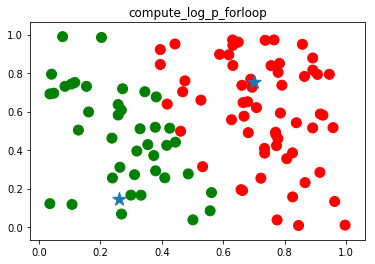

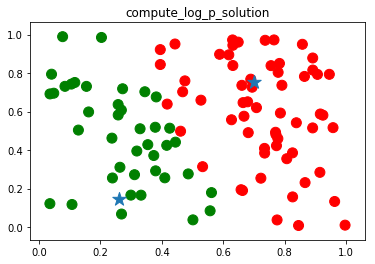

In [ ]:
### -----
### Applying log to our function + Solution

def compute_log_p_forloop(X, mean, sigma):
    return np.log(compute_p_forloop(X, mean, sigma))
    
def compute_log_p_solution(X, mean, sigma):
    dxm = X - mean
    return -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1) - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

### -----
### Difference between solution and this implementation

a = compute_log_p_forloop(X, means[0], sigmas[0])
b = compute_log_p_solution(X, means[0], sigmas[0])

print("|a-b|_2 =", np.linalg.norm(a-b))

### -----
### Print the graphs

def makeGraph(function, X, means, sigmas):
    log_ps = [function(X, m, s) for m, s in zip(means, sigmas)]

    assignments = np.argmax(log_ps, axis=0)

    colors = np.array(['red', 'green'])[assignments]
    plt.title(function.__name__)
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
    plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
    plt.show()
    
makeGraph(compute_log_p_forloop, X, means, sigmas)
makeGraph(compute_log_p_solution, X, means, sigmas)


## Computing the log-probability directly

**Why log?** - Our goal is to compare probabilities to see to which of the two stars a point belongs.

But the formula for the probability is a bit heavy, with multiplications and exponents.

By applying a log transform, we get additions and multiplications, which is easer to handle, and does not impact the comparison - if `a > b`, `log(a) > log(b)`.

(If it does not make sense - don't worry - you'll see this in the coming lectures)

### Simplifying the equation

Notation: $x$ is a sample, so $[D \times 1]$, $X$ is the matrix, so $[N \times D]$

$$p(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right)$$

$$\log p(x | \mu, \Sigma) = \log \left[ \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right) \right]$$

$$\log p(x | \mu, \Sigma) = \log \left[ \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \right] + \log \left[\exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right) \right]$$

$$\log p(x | \mu, \Sigma) = -\log \left[ (2\pi)^{d/2} |\Sigma|^{1/2} \right] - \frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)$$

This gives us the following expression,
$$\log p(x | \mu, \Sigma) = - \frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu) + c(\mu,\Sigma),$$
Where $c(\mu, \Sigma) = -\log \left[ (2\pi)^{d/2} |\Sigma|^{1/2} \right] = - \frac{1}{2}\left[d\log(2 \pi) + \log(|\Sigma|)\right]$

Steps used:
- $\log(ab) = \log(a) + \log(b)$
- $\log(1/a) = -\log(a)$
- $\log(\exp(a)) = a$

### Implementing this function

|a-b|_2 = 4.7207330545682824e-15


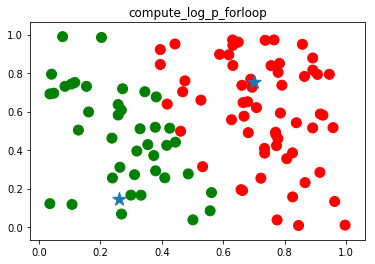

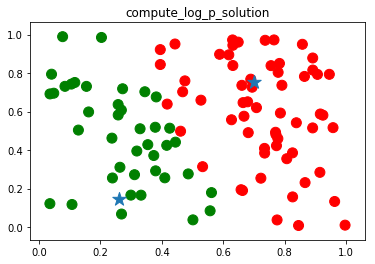

In [ ]:
def compute_log_p_forloop(X, mean, sigma):
    [n, d] = np.shape(X)
    result = np.zeros((n,))
    
    constant = -0.5 * (d*np.log(2*np.pi) + np.log(np.linalg.det(sigma)))
    invSigma = np.linalg.inv(sigma)
    
    for i in range(n):
        xmu = X[i] - mean
        result[i] = -(1/2) * (xmu).T.dot(invSigma).dot(xmu) + constant
    
    return result

### -----
### Difference between solution and this implementation

a = compute_log_p_forloop(X, means[0], sigmas[0])
b = compute_log_p_solution(X, means[0], sigmas[0])
print("|a-b|_2 =", np.linalg.norm(a-b))

### -----
### Print the graphs
    
makeGraph(compute_log_p_forloop, X, means, sigmas)
makeGraph(compute_log_p_solution, X, means, sigmas)


### Matrix formulation - using no for loops

Now, how can we use numpy to avoid using for loops?

This is firstly an algebra problem, not a programming one - the programming is just translation. Our main tools are
- Traditional matrix multiplication
- Addition and multiplication by scalars
- Elementwise Addition and multiplication by matrices
- Summation and product over rows or columns
- ...

But first, we need to know what we are after. The expression for the log is
$$\log p(x | \mu, \Sigma) = - \frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu) + c(\mu,\Sigma),$$
Where $c(\mu, \Sigma) = -\log \left[ (2\pi)^{d/2} |\Sigma|^{1/2} \right] = - \frac{1}{2}\left[d\log(2 \pi) + \log(|\Sigma|)\right]$

And our function `compute_log_p` should return a vector of `N` elements, which is

$$
\texttt{compute_log_p}(X, \mu, \Sigma) = 
\begin{pmatrix}
\log p(x_1 | \mu, \Sigma)\\
...\\
\log p(x_n | \mu, \Sigma)\\
\end{pmatrix}
=
-\frac{1}{2}
\begin{pmatrix}
(x_1 - \mu)^T\Sigma^{-1}(x_1-\mu)\\
...\\
(x_N - \mu)^T\Sigma^{-1}(x_N-\mu)\\
\end{pmatrix}
+c(\mu, \Sigma)
$$

Let us focus on the matrix part of the formula, which we'll call $M$, after some simplification:
- substitue $A = X - \mu$ (a is a `[N x D]` matrix).
- $A_i$ is the first row, a `D`-elements vector
- $A_{ij}$ is the element at cell $i,j$. 


We have

$$
M=
\begin{pmatrix}
A_1^T\Sigma^{-1}A_1\\
...\\
A_N^T\Sigma^{-1}A_N\\
\end{pmatrix}
$$

Can we simplify the expression? For a single row, we have


$$M_i = A_i^T \Sigma^{-1} A_i = 
\begin{pmatrix}
A_{i1} & ... & A_{iD}
\end{pmatrix}
\begin{pmatrix}
    \Sigma_{11} & ... & \Sigma_{1D} \\
    \vdots      & \ddots & \vdots   \\
    \Sigma_{D1} & ... & \Sigma_{DD} \\
\end{pmatrix}^{-1}
\begin{pmatrix}
A_{i1} \\ ... \\ A_{iD}
\end{pmatrix}
\text{  -  Dimensions:  } [1 x D] [D x D] [D x 1] \text{  }
$$

From here, there are two path - simplification using the properties of the matrices we have, and a more brute force approach.



#### Simplifying using the properties of the matrices

The thing to note is that $\Sigma$ is a diagonal matrix (Data loading code: `S = np.diag(rand(d))`). Therefore, we have 
$$M_i = A_i^T \Sigma^{-1} A_i = 
\begin{pmatrix}
A_{i1} & ... & A_{iD}
\end{pmatrix}
\begin{pmatrix}
    1/\Sigma_{11} & 0      & ...    & 0 \\
    0           & \ddots & \ddots & \vdots   \\
    \vdots      & \ddots & \ddots & \vdots   \\
    0           & ...    & ...    & 1/\Sigma_{DD} \\
\end{pmatrix}
\begin{pmatrix}
A_{i1} \\ ... \\ A_{iD}
\end{pmatrix}
$$

$$
=
\begin{pmatrix}
A_{i1} & ... & A_{iD}
\end{pmatrix}
\begin{pmatrix}
A_{i1}/\Sigma_{11} \\ ... \\ A_{iD}/\Sigma_{DD} 
\end{pmatrix}
=
\sum_{j=1}^D A_{ij}^2 /\Sigma_{jj}
=
\begin{pmatrix}
A_{i1}^2 & ... & A_{iD}^2
\end{pmatrix}
\begin{pmatrix}
1/\Sigma_{11} \\ ... \\ 1/\Sigma_{DD} 
\end{pmatrix}
$$

Notice that on those last formulations, we have a `[1 x D] [D x 1]` system. The `[D x 1]` matrix is a transformation we apply to the `[1 x D]` input, and we can apply it to all samples by providing a `[N x D]` input, as follow.
$$
=
\begin{pmatrix}
A_{11}^2 & ...    & A_{1D}^2 \\
\vdots   & \ddots & \vdots   \\
A_{N1}^2 & ...    & A_{ND}^2 \\
\end{pmatrix}
\begin{pmatrix}
1/\Sigma_{11} \\ ... \\ 1/\Sigma_{DD} 
\end{pmatrix}
$$

Or, in (pseudo) code,

    A = X - mu
    A2 = A * A # element-wise multiplication
    invSigma = np.linalg.inverse(Sigma)
    diagInvSigma = np.diag(invSigma)
    M = A2.dot(diagInvSigma)
    
    compute_log_p(X, mu, sigma) = - 0.5 * M + c(mu, sigma)
    


|a-b|_2 = 7.56989756821848e-15


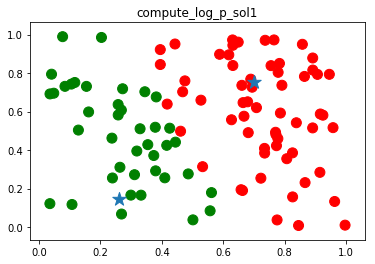

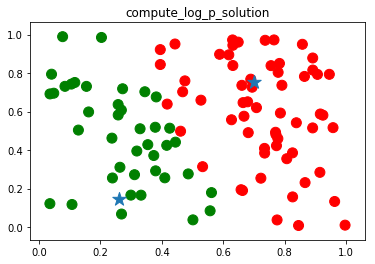

In [ ]:
def compute_log_p_sol1(X, mean, sigma):
    [n, d] = np.shape(X)
    
    constant =  - 0.5 * (d * np.log(2 * np.pi) + np.log(np.linalg.det(sigma)))
    
    diagInvSigma = np.diag(np.linalg.inv(sigma))
    xmu = X - mean
    xmu2 = xmu*xmu
    return -0.5 * xmu2.dot(diagInvSigma) + constant

    #return result

### -----
### Difference between solution and this implementation

a = compute_log_p_sol1(X, means[0], sigmas[0])
b = compute_log_p_solution(X, means[0], sigmas[0])
print("|a-b|_2 =", np.linalg.norm(a-b))

### -----
### Print the graphs
    
makeGraph(compute_log_p_sol1, X, means, sigmas)
makeGraph(compute_log_p_solution, X, means, sigmas)


#### More bruteforce approach

If your $\Sigma$ matrix is less nice, you might need to take some more steps. Again, looking at a single sample, we have

$$M_i = A_i^T \Sigma^{-1} A_i = 
\begin{pmatrix}
A_{i1} & ... & A_{iD}
\end{pmatrix}
\begin{pmatrix}
    \Sigma_{11} & ... & \Sigma_{1D} \\
    \vdots      & \ddots & \vdots   \\
    \Sigma_{D1} & ... & \Sigma_{DD} \\
\end{pmatrix}^{-1}
\begin{pmatrix}
A_{i1} \\ ... \\ A_{iD}
\end{pmatrix}
$$

Using $\Sigma' = \Sigma^{-1}$ to avoid confusion between the matrix inverse and the elementwise inverse, this gives

$$M_n = 
\begin{pmatrix}
A_{n1} & ... & A_{nD}
\end{pmatrix}
\begin{pmatrix}
\sum_{i=1}^D a_{ni} \Sigma'_{1i} \\
\vdots \\
\sum_{i=1}^D a_{ni} \Sigma'_{Di} \\
\end{pmatrix}
= \sum_{i=1}^D \sum_{j=1}^D a_{ni} a_{nj} \Sigma'_{ij}
$$

In last section we found a nice way to split the one sample the expression to a `[1 x D][D x 1]` matrix multiplication, with the inputs on the left `[1 x D]` matrix and the transformation being the `[D x 1]` matrix; extanding to a `[N x D]` input is easy. Here, we are not assuming that $\Sigma$ is diagonal, which complicates a little bit the system. We will need to bring two tools out of the box:

* Column summation - transforms a `[A x B]` matrix into a `[A x 1]` matrix by summing all columns, for each row, as follow:
$$
\texttt{column summation of }
\begin{pmatrix}
y_{11} & y_{12} & ... & y_{1B} \\
y_{21} & y_{22} & ... & y_{2B}
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^B y_{1i} \\
\sum_{i=1}^B y_{2i}
\end{pmatrix}
$$
* Element-wise matrix multiplication - What the `*` operator does on numpy matrices - written $\odot$ here, 
$$
\begin{pmatrix}
y_{1} & y_{2} & ... & y_{B} 
\end{pmatrix}
\odot
\begin{pmatrix}
z_{1} & z_{2} & ... & z_{B} 
\end{pmatrix}
=
\begin{pmatrix}
y_{1}z_{1} & y_{2}z_{2} & ... & y_{B}z_{B}
\end{pmatrix}
$$

Using those tools, we can work out a better representation for our formula. We first expand one of the summation by doing a reverse-column-summation to go from our scalar result to a `[D x 1]` matrix.
$$
\sum_{i=1}^D \sum_{j=1}^D a_{ni} a_{nj} \Sigma'_{ij}
=
\begin{pmatrix}
A_{n1} \sum_{j=1}^D A_{nj} \Sigma'_{1j} & 
A_{n2} \sum_{j=1}^D A_{nj} \Sigma'_{2j} & 
...
A_{nD} \sum_{j=1}^D A_{nj} \Sigma'_{Dj}
\end{pmatrix}
$$
We now can separate the matrix into two parts using element-wise multiplication.
$$
=
\begin{pmatrix}
A_{n1} & 
A_{n2} & 
...
A_{nD}
\end{pmatrix}
\odot
\begin{pmatrix}
\sum_{j=1}^D A_{nj} \Sigma'_{1j} & 
\sum_{j=1}^D A_{nj} \Sigma'_{2j} & 
...
\sum_{j=1}^D A_{nj} \Sigma'_{Dj}
\end{pmatrix}
$$
$$
=
A_n
\odot
\begin{pmatrix}
\sum_{j=1}^D A_{nj} \Sigma'_{1j} & 
\sum_{j=1}^D A_{nj} \Sigma'_{2j} & 
...
\sum_{j=1}^D A_{nj} \Sigma'_{Dj}
\end{pmatrix}
$$
Now, we can see that the `[1 x D]` matrix on the right is the result of $A_n\Sigma'$ (`[1 x D][D x D]`).
$$
=
A_n \odot (A_n \Sigma')
$$


And this is it. If instead of $A_n$, we plug $A$ into the system, we get a `[N x D]` $\odot$ `[N x D][D x D]` system, the solution for every sample in one line,
$$A \odot (A \Sigma')$$




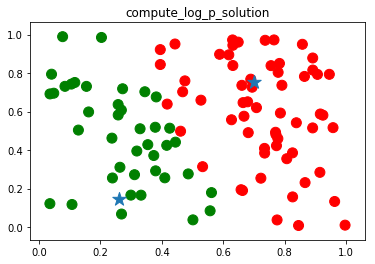

In [ ]:
def compute_log_p_solution(X, mean, sigma):
    d = X.shape[1]
    c = - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))
    A = X - mean
    invSigma = np.linalg.inv(sigma)
    
    return -0.5 * np.sum(A * (A.dot(invSigma)), axis=1) + c

makeGraph(compute_log_p_solution, X, means, sigmas)

### Why do we even care?

Time.

For loops are much more expensive than lingear algebra - for which we have specialized libraries, Code that correctly uses linear algebra can run 10x to 100x faster than a for-loop program for the same output.

Here is a comparison of the different solutions,
* Using for loops
* Using numpy to do the heavy lifting
* Using the fact that $\Sigma$ is a diagonal

Most of the benefit comes from using numpy correctly

In [ ]:
import time

def generateData(n, d, k):
    X = rand(n, d)
    means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2
    S = np.diag(rand(d))
    sigmas = [S]*k
    
    return X, means, sigmas

matrix_time = np.zeros(10,)
forloop_time = np.zeros(10,)
i = 0
Ns = np.logspace(0, 7, num=10)
for N in Ns:
    X_n, means_n, sigmas_n = generateData(int(np.floor(N)), 2, 2)
    
    start_time = time.time()
    compute_log_p_solution(X_n, means_n[0], sigmas_n[0])
    matrix_time[i] = time.time() - start_time

    start_time = time.time()
    compute_log_p_forloop(X_n, means_n[0], sigmas_n[0])
    forloop_time[i] = time.time() - start_time
    
    i += 1


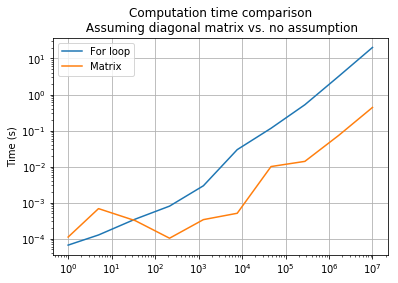

In [ ]:

plt.title('Computation time comparison\n Assuming diagonal matrix vs. no assumption')
h1 = plt.plot(np.floor(Ns), forloop_time, label='For loop')
h2 = plt.plot(np.floor(Ns), matrix_time, label='Matrix')
plt.xscale("log", nonpositive='clip')
plt.yscale("log", nonpositive='clip')
plt.ylabel('Time (s)')
plt.legend(['For loop', 'Matrix'])
plt.grid()
plt.show()



In [ ]:
import datetime
import timeit

def generateData(n, d, k):
    X = rand(n, d)
    means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2
    S = np.diag(rand(d))
    sigmas = [S]*k
    
    return X, means, sigmas

matrix_time = np.zeros(10,)
diag_time = np.zeros(10,)
i = 0
Ns = np.logspace(0, 7, num=10)
for N in Ns:
    X_n, means_n, sigmas_n = generateData(int(np.floor(N)), 2, 2)
    
    start_time = time.time()
    compute_log_p_solution(X_n, means_n[0], sigmas_n[0])
    matrix_time[i] = time.time() - start_time

    start_time = datetime.datetime.now()
    compute_log_p_sol1(X_n, means_n[0], sigmas_n[0])
    diag_time[i] = (datetime.datetime.now() - start_time).total_seconds()
    
    i += 1



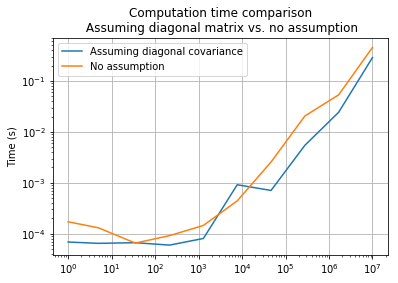

In [ ]:
plt.title('Computation time comparison\n Assuming diagonal matrix vs. no assumption')
h1 = plt.plot(np.floor(Ns), diag_time, label='Assuming diagonal covariance')
h2 = plt.plot(np.floor(Ns), matrix_time, label='Matrix')
plt.xscale("log", nonpositive='clip')
plt.yscale("log", nonpositive='clip')
plt.ylabel('Time (s)')
plt.legend(['Assuming diagonal covariance', 'No assumption'])
plt.grid()
plt.show()

